In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

### Planes datasetidan ma'lumotlarni EDA qilamiz

In [124]:
planes_df = pd.read_csv("planes.csv")
old_df = planes_df.describe() # - kelajakda tozalangan dataframening statistikalari bilan farqini ko'rish uchun olindi
planes_df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0
5,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270.0
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087.0
7,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625.0
8,Air India,1/06/2019,Delhi,Cochin,DEL → BLR → COK,09:45,23:00,13h 15m,1 stop,No info,8907.0
9,IndiGo,18/04/2019,Kolkata,Banglore,CCU → BLR,20:20,22:55,2h 35m,non-stop,No info,4174.0


In [125]:
display(planes_df.info(memory_usage = 'deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10660 entries, 0 to 10659
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10233 non-null  object 
 1   Date_of_Journey  10338 non-null  object 
 2   Source           10473 non-null  object 
 3   Destination      10313 non-null  object 
 4   Route            10404 non-null  object 
 5   Dep_Time         10400 non-null  object 
 6   Arrival_Time     10466 non-null  object 
 7   Duration         10446 non-null  object 
 8   Total_Stops      10448 non-null  object 
 9   Additional_Info  10071 non-null  object 
 10  Price            10044 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.1 MB


None

#### info() methodi orqali ustunlar va datasetimizning hajmi haqida ma'lumot oldik

#### NaN qiymatlarning ustunlardagi ulushini chiqarib olamiz

In [126]:
display(planes_df.isnull().mean() * 100)
display(f"Bitta ustundagi NaN qiymatning maximal ulishi = {round((planes_df.isnull().mean() * 100).max(), 2)}%")

Airline            4.005629
Date_of_Journey    3.020638
Source             1.754221
Destination        3.255159
Route              2.401501
Dep_Time           2.439024
Arrival_Time       1.819887
Duration           2.007505
Total_Stops        1.988743
Additional_Info    5.525328
Price              5.778612
dtype: float64

'Bitta ustundagi NaN qiymatning maximal ulishi = 5.78%'

#### Natijaga ko'ra ustunlarda NaN qiymatlar ulushi juda katta emas maximal ulush bitta ustunda 5.78%

### Datasetni NaN qiymatlardan tozalab olamiz chunki tepadagi natijadan shu ma'lumki datsetda NaN qiymatlar mavjud. Buni aniqroq ma'lumot olish uchun qilamiz

In [127]:
for i in planes_df.columns:
    if pd.api.types.is_numeric_dtype(planes_df[i]):
        planes_df[i] = pd.to_numeric(planes_df[i], errors = 'coerce')
        planes_df[i] = planes_df[i].fillna(planes_df[i].mean())
    else:
        planes_df[i] = planes_df[i].fillna(planes_df[i].mode().iloc[0])
planes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10660 entries, 0 to 10659
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10660 non-null  object 
 1   Date_of_Journey  10660 non-null  object 
 2   Source           10660 non-null  object 
 3   Destination      10660 non-null  object 
 4   Route            10660 non-null  object 
 5   Dep_Time         10660 non-null  object 
 6   Arrival_Time     10660 non-null  object 
 7   Duration         10660 non-null  object 
 8   Total_Stops      10660 non-null  object 
 9   Additional_Info  10660 non-null  object 
 10  Price            10660 non-null  float64
dtypes: float64(1), object(10)
memory usage: 916.2+ KB


#### NaN qiymatlarni numeric bo'lganda o'rta ariqfmetigi bilan object bo'lganda modasi bilan to'ldirib oldim

In [128]:
# planes_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

#### Dataframening eski statistikalarini yangi tozalangan statistikalaridan ayirib farqini ko'ramiz

In [129]:
planes_df.describe() - old_df

,Price
count,616.00000
mean,0.00000
std,-131.15378
min,0.00000
25%,306.25000
50%,348.00000
75%,-252.00000
max,0.00000


#### mean, min, max bular o'zgarmadi, boshqa ko'rsatgichlarda o'zgarish bor

In [130]:
planes_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0
...,...,...,...,...,...,...,...,...,...,...,...
10655,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107.0
10656,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145.0
10657,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,18:55,11:20,3h,non-stop,No info,7229.0
10658,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648.0


#### Duration ustunidagi str tipida yozilgan vaqtlarni datetime tipiga o'tkazib olamiz

In [131]:
planes_df['Duration'] = pd.to_timedelta(planes_df['Duration'])

In [132]:
planes_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,0 days 19:00:00,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,0 days 05:25:00,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,0 days 04:45:00,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,0 days 02:25:00,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,0 days 15:30:00,1 stop,In-flight meal not included,11087.0
...,...,...,...,...,...,...,...,...,...,...,...
10655,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,0 days 02:30:00,non-stop,No info,4107.0
10656,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,0 days 02:35:00,non-stop,No info,4145.0
10657,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,18:55,11:20,0 days 03:00:00,non-stop,No info,7229.0
10658,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,0 days 02:40:00,non-stop,No info,12648.0


#### to_timedelta() funksiyasi orqali bu ishni omadli bajarib oldik

#### Total_Stops ustunidagi qiymatlarni sonlar ko'rinishiga o'tkazib olamiz chunki u yerda 5xil categorikal qiymat mavjud bular [2 stops', '1 stop', 'non-stop', '3 stops', '4 stops'] va biz bularni numeric holatda saqlaganimiz ma'qul

In [133]:
stop_mapping = {
    '2 stops': 2,
    '1 stop': 1,
    'non-stop': 0,
    '3 stops': 3,
    '4 stops': 4
}

planes_df['Total_Stops'] = planes_df['Total_Stops'].map(stop_mapping)

#### Natijada samaliyot uchish chog'ida necha marta to'xtaganligini (Total_Stops) sonlar orqali bilib olishimiz mumkin bunda biz map() funksiyasidan foydalandik

In [134]:
planes_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,0 days 19:00:00,2,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,0 days 05:25:00,1,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,0 days 04:45:00,1,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,0 days 02:25:00,0,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,0 days 15:30:00,1,In-flight meal not included,11087.0
...,...,...,...,...,...,...,...,...,...,...,...
10655,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,0 days 02:30:00,0,No info,4107.0
10656,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,0 days 02:35:00,0,No info,4145.0
10657,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,18:55,11:20,0 days 03:00:00,0,No info,7229.0
10658,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,0 days 02:40:00,0,No info,12648.0


#### Endigi navbatda 'Date_of_Journey' ustunini datetime tipiga o'tkazib olamiz

In [135]:
d = planes_df['Date_of_Journey'].dtype
print(d)

object


##### Date_of_Journey ustunini tekshirdim va shuni ko'rishimiz mumkinki bu ustundagi ma'lumot tiplari string tipida

In [136]:
planes_df['Date_of_Journey'] = pd.to_datetime(planes_df['Date_of_Journey'], format='mixed', dayfirst=True)

##### Qiymatlarini datetime formatiga o'tkazib oldim endi natijani chiqarib ko'raman

In [137]:
planes_df['Date_of_Journey'].head()

0   2019-06-09
1   2019-05-12
2   2019-03-01
3   2019-06-24
4   2019-03-12
Name: Date_of_Journey, dtype: datetime64[ns]

#### Bu ustunni ham tushunarli holatga keltirib oldik va yana to_timedelta() methodi yordamida

In [138]:
planes_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,0 days 19:00:00,2,No info,13882.0
1,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,0 days 05:25:00,1,No info,6218.0
2,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,0 days 04:45:00,1,No info,13302.0
3,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,09:00,11:25,0 days 02:25:00,0,No info,3873.0
4,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,0 days 15:30:00,1,In-flight meal not included,11087.0
...,...,...,...,...,...,...,...,...,...,...,...
10655,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55,22:25,0 days 02:30:00,0,No info,4107.0
10656,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,0 days 02:35:00,0,No info,4145.0
10657,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,18:55,11:20,0 days 03:00:00,0,No info,7229.0
10658,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,11:30,14:10,0 days 02:40:00,0,No info,12648.0


#### Tekshirish uchun yana bir bor datasetni chiqarib ko'rdim

### Endigi galda 'Total_Stops' va 'Price' o'rtasidagi korrelatsiyani ko'ramiz 

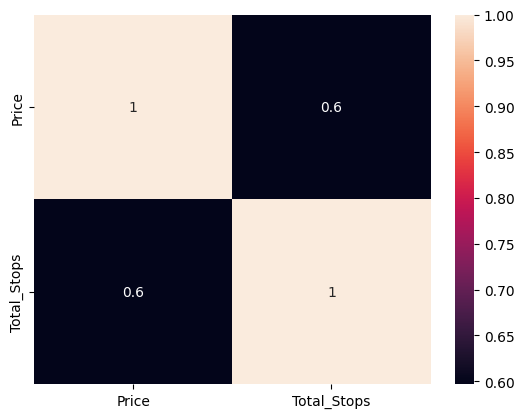

In [154]:
sns.heatmap(planes_df[['Price', 'Total_Stops']].corr(), annot = True)
plt.show()

### 60% bog'liqlik bilan bilet narxiga to'xtashlar soni ta'sir qilar ekan, ya'ni bilet narxi oshsa 60% ehtimollik bilan to'xtashlar soni ham ortadi va aksincha